In [10]:
import pandas as pd

files = ['valeursfoncieres-2019.txt','valeursfoncieres-2020.txt','valeursfoncieres-2021.txt','valeursfoncieres-2022.txt','valeursfoncieres-2023.txt']
dfs = []
total = 0
for file in files:

   # Lecture du fichier en tant que DataFrame pandas
    df = pd.read_csv(file, delimiter='|', low_memory=False)
    dfs.append(df)

    # Compter le nombre de lignes
    with open(file,'r') as f:
      num_lines=sum(1 for line in f)
      total += num_lines


# Concatenation de tous les DataFrames de la liste dfs en un seul DataFrame
df_concatenated=pd.concat(dfs,ignore_index=True)
num_columns = df_concatenated.shape[1]

print("Le nombre total des lignes de tous les fichiers : ", total)
print(f"Le nombre de colonnes dans le DataFrame est : {num_columns}")


Le nombre total des lignes de tous les fichiers :  1345097
Le nombre de colonnes dans le DataFrame est : 43


In [11]:
print(df_concatenated.head())
print(df_concatenated.info())
print(df_concatenated.describe())

   Identifiant de document  Reference document  1 Articles CGI  \
0                      NaN                 NaN             NaN   
1                      NaN                 NaN             NaN   
2                      NaN                 NaN             NaN   
3                      NaN                 NaN             NaN   
4                      NaN                 NaN             NaN   

   2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   No disposition Date mutation Nature mutation  ...  \
0               1    04/01/2019           Vente  ...   
1               1    04/01/2019           Vente  ...   
2               1   

In [12]:
# Identifier les colonnes entièrement vides
cols_to_drop = [col for col in df_concatenated.columns if df_concatenated[col].notnull().sum() == 0]

# Suppression des colonnes entièrement vides

df_cleaned = df_concatenated.drop(columns=cols_to_drop)
additional_columns_to_drop = [
    'No disposition', 'B/T/Q', 'Prefixe de section', 'No plan', 'No Volume',
    '1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot',
    'Nature culture', 'Nature culture speciale'
]

df_cleaned = df_cleaned.drop(columns=additional_columns_to_drop)

# Affichage des colonnes supprimées et des informations après suppression des colonnes inutiles et conversion des données
num_columns = df_cleaned.shape[1]
print(f"Le nombre de colonnes après suppression des colonnes inutiles est : {num_columns}")
print(f"Colonnes inutiles supprimées : {additional_columns_to_drop}")
print(df_cleaned.head())
print(df_cleaned.info())
print(df_cleaned.describe())


Le nombre de colonnes après suppression des colonnes inutiles est : 23
Colonnes inutiles supprimées : ['No disposition', 'B/T/Q', 'Prefixe de section', 'No plan', 'No Volume', '1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot', 'Nature culture', 'Nature culture speciale']
  Date mutation Nature mutation Valeur fonciere  No voie Type de voie  \
0    04/01/2019           Vente        37220,00     26.0          RUE   
1    04/01/2019           Vente       185100,00     22.0          RUE   
2    04/01/2019           Vente       185100,00     22.0          RUE   
3    08/01/2019           Vente       209000,00      3.0          RUE   
4    07/01/2019           Vente       134900,00      5.0          LOT   

  Code voie             Voie  Code postal                Commune  \
0      2730     DE MONTHOLON       1000.0        BOURG-EN-BRESSE   
1      1650  GEN DELESTRAINT       1000.0        BOURG-EN-BRESSE   
2      1650  GEN DELESTRAINT       1000.0        BOURG-EN-BRESSE   
3      00

In [13]:
# Conversion de la colonne 'Valeur fonciere' en string, remplacement des virgules et conversion en float
df_cleaned['Valeur fonciere'] = df_cleaned['Valeur fonciere'].astype(str).str.replace(',', '.').astype(float)

# Conversion de la colonne 'Date mutation' en type datetime avec gestion des erreurs
df_cleaned['Date mutation'] = pd.to_datetime(df_cleaned['Date mutation'], format='%d/%m/%Y', errors='coerce')

# Identification des lignes avec des dates invalides
invalid_dates = df_cleaned[df_cleaned['Date mutation'].isnull()]
print("Lignes avec des dates invalides:")
print(invalid_dates[['Date mutation']].head())

# Suppression des lignes avec des dates invalides
df_cleaned = df_cleaned.dropna(subset=['Date mutation'])

# Vérification des conversions
print(df_cleaned.dtypes)


Lignes avec des dates invalides:
        Date mutation
353236            NaT
1329329           NaT
Date mutation                 datetime64[ns]
Nature mutation                       object
Valeur fonciere                      float64
No voie                              float64
Type de voie                          object
Code voie                             object
Voie                                  object
Code postal                          float64
Commune                               object
Code departement                     float64
Code commune                         float64
Section                               object
Surface Carrez du 1er lot             object
Surface Carrez du 2eme lot            object
Surface Carrez du 3eme lot            object
Surface Carrez du 4eme lot            object
Surface Carrez du 5eme lot            object
Nombre de lots                       float64
Code type local                      float64
Type local                            object
S

In [14]:
# Imputation par la médiane pour les colonnes numériques
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Imputation par le mode pour les colonnes catégorielles
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Vérification des valeurs manquantes après imputation
print(df_cleaned.isnull().sum())


Date mutation                 0
Nature mutation               0
Valeur fonciere               0
No voie                       0
Type de voie                  0
Code voie                     0
Voie                          0
Code postal                   0
Commune                       0
Code departement              0
Code commune                  0
Section                       0
Surface Carrez du 1er lot     0
Surface Carrez du 2eme lot    0
Surface Carrez du 3eme lot    0
Surface Carrez du 4eme lot    0
Surface Carrez du 5eme lot    0
Nombre de lots                0
Code type local               0
Type local                    0
Surface reelle bati           0
Nombre pieces principales     0
Surface terrain               0
dtype: int64


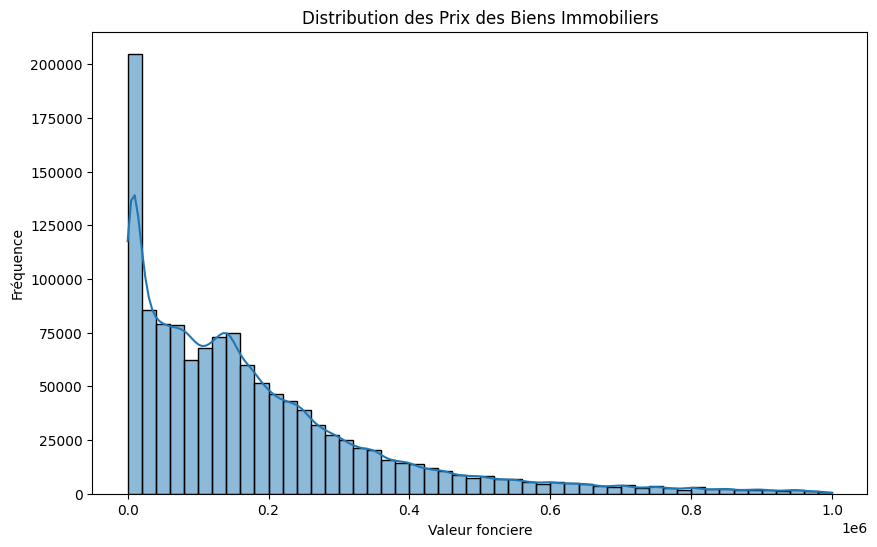

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une limite pour les valeurs foncières
limite_prix = 1e6

# Visualisation de la distribution des prix des biens immobiliers avec une limite
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['Valeur fonciere'] < limite_prix]['Valeur fonciere'], bins=50, kde=True)
plt.title('Distribution des Prix des Biens Immobiliers' )
plt.xlabel('Valeur fonciere')
plt.ylabel('Fréquence')
plt.show()

# On remarque que le prix est principalement concentré dans la fourchette inférieure à 200,000 euro.
# Les biens plus chers sont moins fréquents.



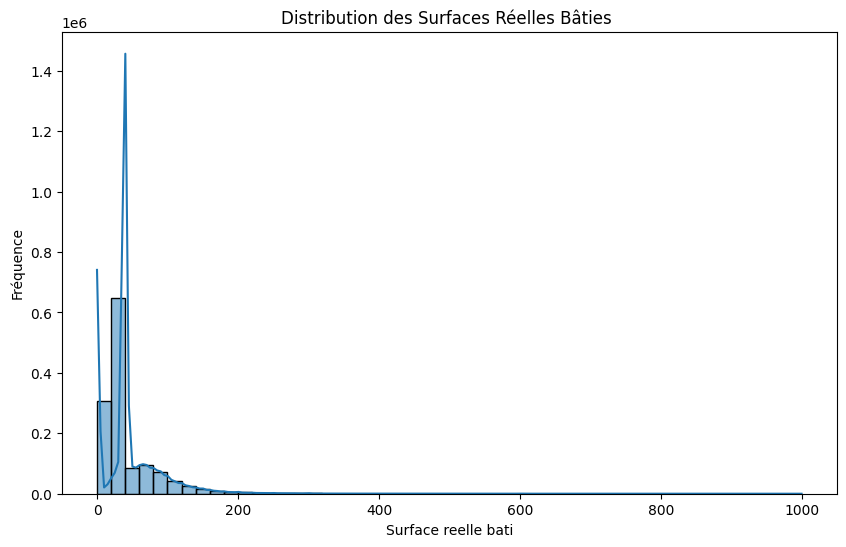

In [16]:
# Définir une limite pour les surfaces réelles bâties (par exemple, 1000 m²)
limite_surface_batie = 1000

# Visualisation de la distribution des surfaces réelles bâties avec une limite
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['Surface reelle bati'] < limite_surface_batie]['Surface reelle bati'], bins=50, kde=True)
plt.title('Distribution des Surfaces Réelles Bâties ')
plt.xlabel('Surface reelle bati')
plt.ylabel('Fréquence')
plt.show()

#Principalement des petites surfaces inférieures à 100 m².
#Les grandes surfaces bâties sont rares

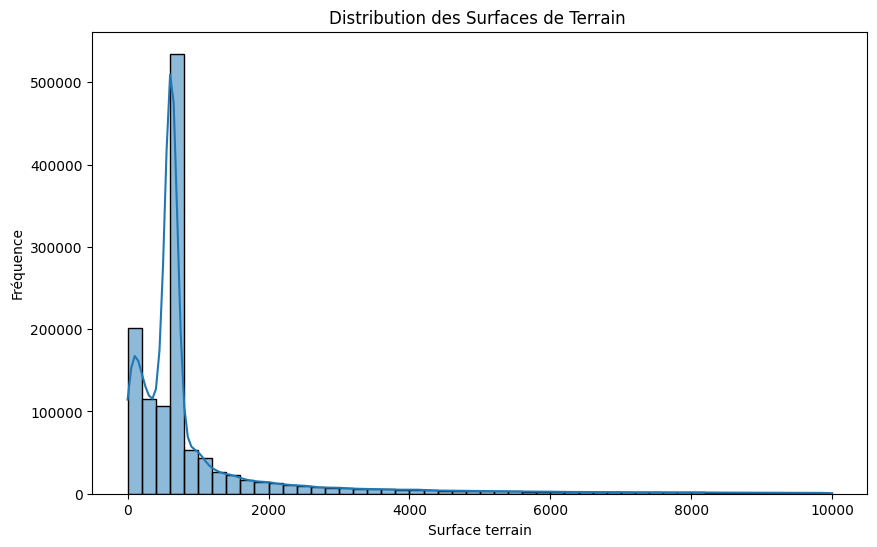

In [17]:
# Définir une limite pour les surfaces de terrain (par exemple, 10,000 m²)
limite_surface_terrain = 10000

# Visualisation de la distribution des surfaces de terrain avec une limite
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['Surface terrain'] < limite_surface_terrain]['Surface terrain'], bins=50, kde=True)
plt.title('Distribution des Surfaces de Terrain ')
plt.xlabel('Surface terrain')
plt.ylabel('Fréquence')
plt.show()

#Principalement des petites surfaces de terrain inférieures à 1,000 m².
#Les grands terrains sont rares.

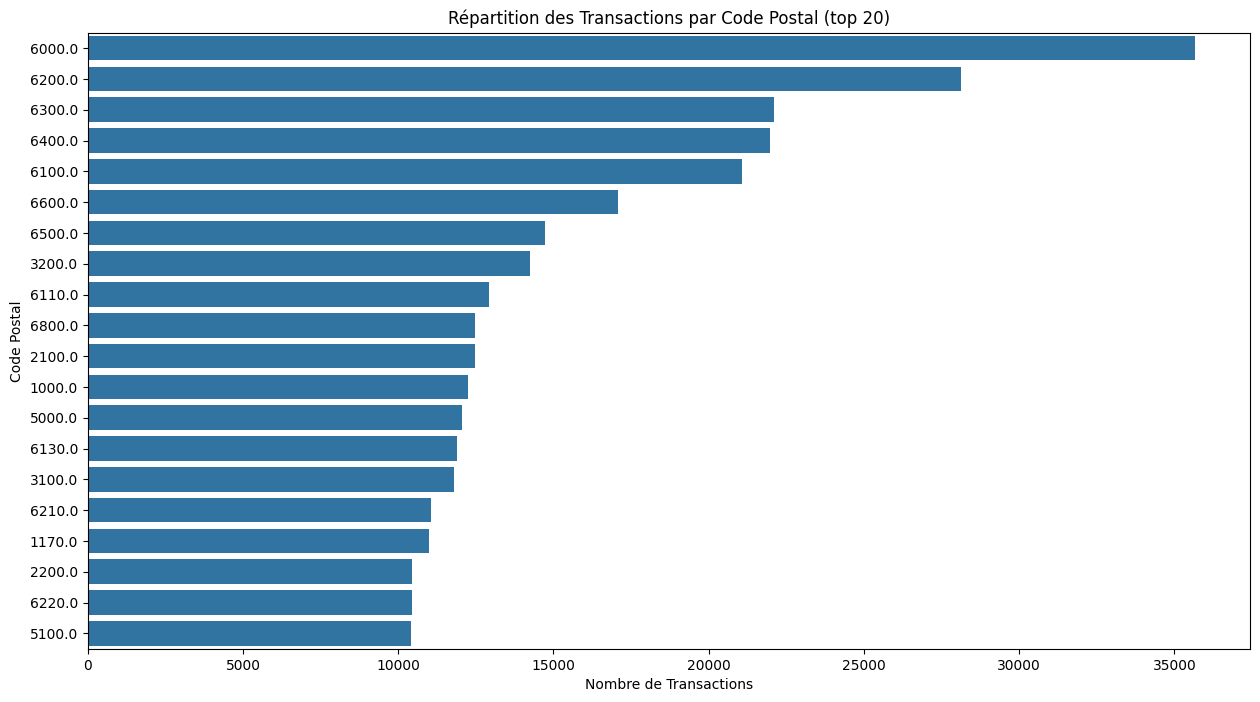

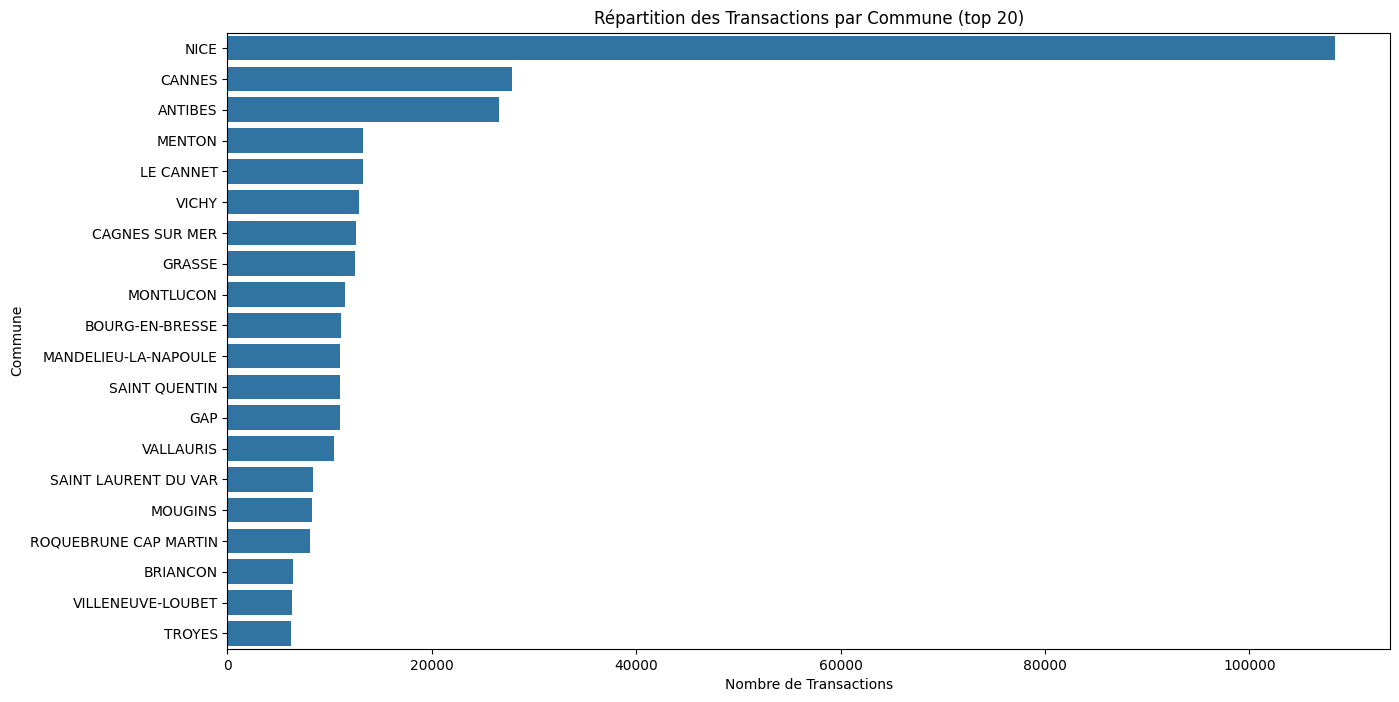

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la répartition des transactions par code postal (top 20)
plt.figure(figsize=(15, 8))
sns.countplot(y=df_cleaned['Code postal'], order=df_cleaned['Code postal'].value_counts().index[:20])
plt.title('Répartition des Transactions par Code Postal (top 20)')
plt.xlabel('Nombre de Transactions')
plt.ylabel('Code Postal')
plt.show()


# Visualisation de la répartition des transactions par commune (top 20)
plt.figure(figsize=(15, 8))
sns.countplot(y=df_cleaned['Commune'], order=df_cleaned['Commune'].value_counts().index[:20])
plt.title('Répartition des Transactions par Commune (top 20)')
plt.xlabel('Nombre de Transactions')
plt.ylabel('Commune')
plt.show()



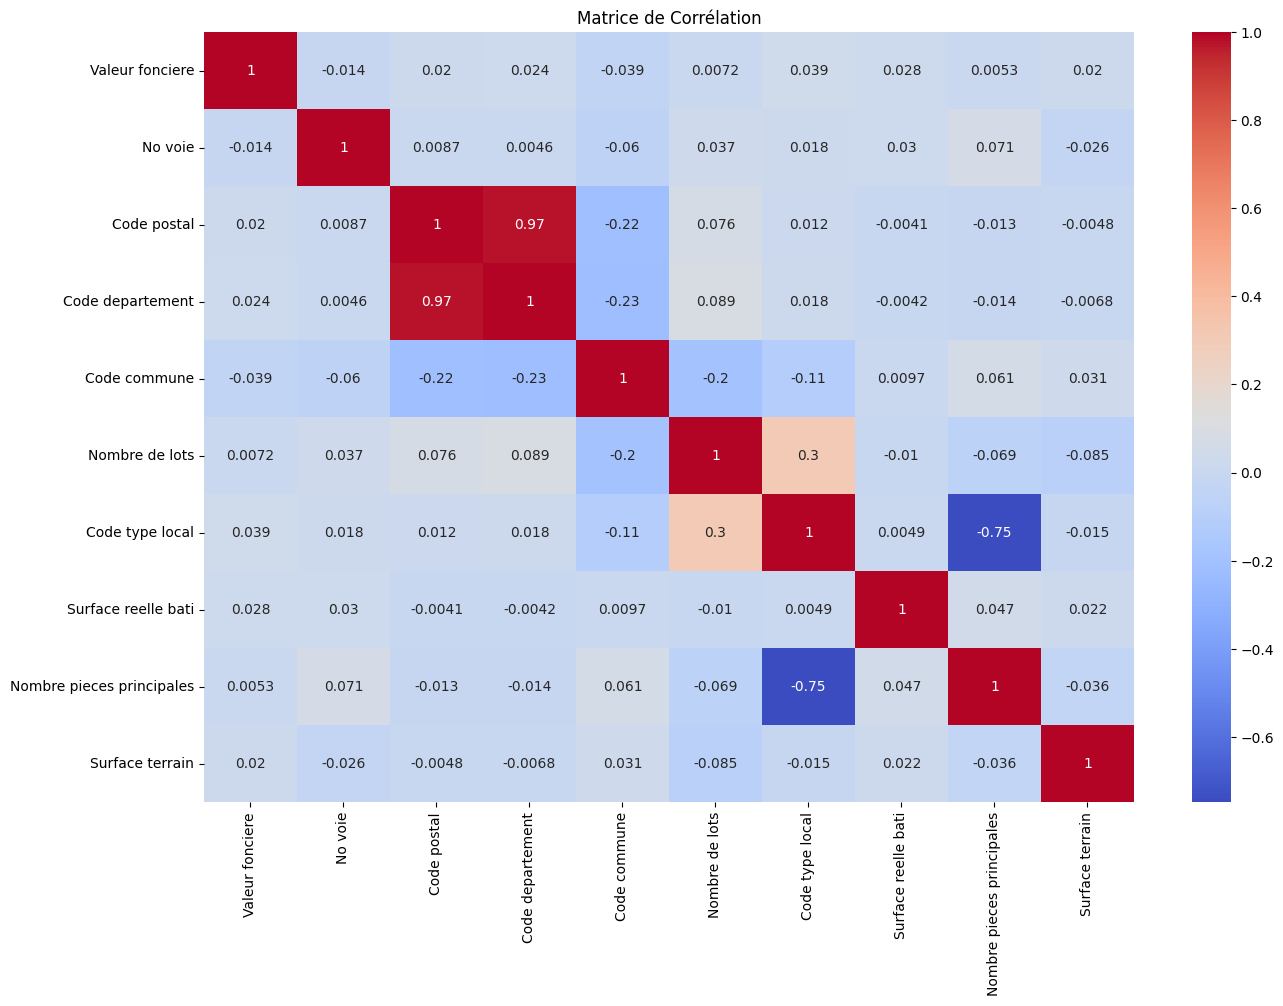

Valeur fonciere              1.000000
Code type local              0.038844
Surface reelle bati          0.027771
Code departement             0.023747
Code postal                  0.020447
Surface terrain              0.019972
Nombre de lots               0.007232
Nombre pieces principales    0.005317
No voie                     -0.013783
Code commune                -0.038852
Name: Valeur fonciere, dtype: float64


In [19]:
import numpy as np


# Sélectionner uniquement les colonnes numériques
df_numeric = df_cleaned.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# Affichage des corrélations spécifiques avec la variable cible 'Valeur fonciere'
correlation_with_prices = correlation_matrix['Valeur fonciere'].sort_values(ascending=False)
print(correlation_with_prices)


In [20]:
import numpy as np

# Filtrage des données pour l'entraînement et le test en fonction de l'année
df_train = df_cleaned[df_cleaned['Date mutation'].dt.year < 2023]
df_test = df_cleaned[df_cleaned['Date mutation'].dt.year == 2023]

# Séparation des caractéristiques (X) et de la cible (y)
X_train = df_train.drop(columns=['Valeur fonciere'])
y_train = df_train['Valeur fonciere']
X_test = df_test.drop(columns=['Valeur fonciere'])
y_test = df_test['Valeur fonciere']

# Vérifier les valeurs infinies dans les colonnes numériques
print("Valeurs infinies dans X_train:")
print(np.isinf(X_train.select_dtypes(include=[np.number])).sum())

print("Valeurs infinies dans X_test:")
print(np.isinf(X_test.select_dtypes(include=[np.number])).sum())

# Vérifier les valeurs trop grandes dans les colonnes numériques
print("Valeurs trop grandes dans X_train:")
print((X_train.select_dtypes(include=[np.number]) > np.finfo(np.float64).max).sum())

print("Valeurs trop grandes dans X_test:")
print((X_test.select_dtypes(include=[np.number]) > np.finfo(np.float64).max).sum())

# Remplacer les valeurs infinies par NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Vérifier les valeurs manquantes après le remplacement des valeurs infinies
print("Valeurs manquantes dans X_train après remplacement des valeurs infinies:")
print(X_train.isnull().sum())

print("Valeurs manquantes dans X_test après remplacement des valeurs infinies:")
print(X_test.isnull().sum())

# Imputation des valeurs manquantes dans les colonnes numériques
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].median())

# Imputation des valeurs manquantes dans les colonnes catégorielles
categorical_cols = X_train.select_dtypes(include=[object]).columns
X_train[categorical_cols] = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
X_test[categorical_cols] = X_test[categorical_cols].fillna(X_test[categorical_cols].mode().iloc[0])

# Vérifier les valeurs manquantes après l'imputation
print("Valeurs manquantes dans X_train après imputation:")
print(X_train.isnull().sum())

print("Valeurs manquantes dans X_test après imputation:")
print(X_test.isnull().sum())

# Affichage des tailles des ensembles d'entraînement et de test après nettoyage
print(f"Taille de l'ensemble d'entraînement après nettoyage : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test après nettoyage : {X_test.shape[0]}")


Valeurs infinies dans X_train:
No voie                      0
Code postal                  0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
dtype: int64
Valeurs infinies dans X_test:
No voie                      0
Code postal                  0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
dtype: int64
Valeurs trop grandes dans X_train:
No voie                      0
Code postal                  0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
dtype: int64
Valeurs trop grandes dans X_

In [21]:
import numpy as np

# Fonction de feature engineering
def feature_engineering(df):
    # Utilisation de .loc pour éviter les avertissements SettingWithCopyWarning
    df = df.copy()

    # Densité : Surface bâtie / Surface terrain
    df.loc[:, 'Densite'] = df['Surface reelle bati'] / df['Surface terrain']

    # Transformation logarithmique des prix pour réduire l'effet des valeurs extrêmes
    df.loc[:, 'Valeur fonciere'] = np.log1p(df['Valeur fonciere'])

    # Extraction de l'année, du mois et du jour de la semaine de la date de mutation
    df.loc[:, 'Annee mutation'] = df['Date mutation'].dt.year
    df.loc[:, 'Mois mutation'] = df['Date mutation'].dt.month
    df.loc[:, 'Jour de la semaine mutation'] = df['Date mutation'].dt.dayofweek

    # Ajouter une fonctionnalité de prix par m²
    df.loc[:, 'Prix_m2'] = df['Valeur fonciere'] / df['Surface reelle bati']

    # Ajouter une estimation de l'âge du bâtiment (nous utilisons une année de construction fictive, car elle n'est pas dans les données)
    annee_construction_estimee = 2000  # année de construction fictive pour l'exemple
    df.loc[:, 'Age_batiment'] = df['Annee mutation'] - annee_construction_estimee

    # Corriger les valeurs infinies résultant des divisions par zéro
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Imputer les valeurs manquantes
    df.fillna({
        'Densite': 0,
        'Prix_m2': df['Valeur fonciere'].median() / df['Surface reelle bati'].median(),
        'Age_batiment': df['Age_batiment'].median()
    }, inplace=True)

    return df

# Appliquer le feature engineering aux ensembles d'entraînement et de test
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

# Vérification des premières lignes pour s'assurer que les nouvelles caractéristiques sont créées correctement
print(df_train.head())
print(df_test.head())


  Date mutation Nature mutation  Valeur fonciere  No voie Type de voie  \
0    2019-01-04           Vente        10.524628     26.0          RUE   
1    2019-01-04           Vente        12.128657     22.0          RUE   
2    2019-01-04           Vente        12.128657     22.0          RUE   
3    2019-01-08           Vente        12.250094      3.0          RUE   
4    2019-01-07           Vente        11.812296      5.0          LOT   

  Code voie             Voie  Code postal                Commune  \
0      2730     DE MONTHOLON       1000.0        BOURG-EN-BRESSE   
1      1650  GEN DELESTRAINT       1000.0        BOURG-EN-BRESSE   
2      1650  GEN DELESTRAINT       1000.0        BOURG-EN-BRESSE   
3      0043   DES CHAMPAGNES       1160.0                  PRIAY   
4      A003        LE BIOLAY       1370.0  SAINT-ETIENNE-DU-BOIS   

   Code departement  ...   Type local Surface reelle bati  \
0               1.0  ...  Appartement                20.0   
1               1.0  ...

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sélectionner les colonnes numériques et catégorielles
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(include=[object]).columns.tolist()

# Pipeline de transformation pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de transformation pour les colonnes catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Appliquer les transformations aux colonnes respectives
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Créer le pipeline complet avec le modèle de régression linéaire
linear_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Entraîner le modèle de régression linéaire
linear_model_pipeline.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = linear_model_pipeline.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
score = linear_model_pipeline.score(X_test, y_test)

print(f"Mean Squared Error du modèle de régression linéaire : {mse}")
print(f"Score du modèle de régression linéaire : {score}")


Mean Squared Error du modèle de régression linéaire : 3406748196590.4277
Score du modèle de régression linéaire : -0.4597651774958653


In [7]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Prendre un échantillon de 50 % des données pour l'entraînement
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Créer le pipeline complet avec le modèle Gradient Boosting
gb_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Définir la grille de paramètres pour la recherche d'hyperparamètres
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Configurer GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(gb_model_pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

# Entraîner le modèle de Gradient Boosting avec GridSearchCV
grid_search.fit(X_train_sample, y_train_sample)

# Meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_

# Évaluer le modèle optimisé sur les données de test
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = grid_search.score(X_test, y_test)
print(f"Mean Squared Error du modèle Gradient Boosting optimisé : {mse}")
print(f"Score du modèle Gradient Boosting optimisé : {score} ")


Mean Squared Error du modèle Gradient Boosting optimisé : 2290000000000
Score du modèle Gradient Boosting optimisé : 0.1932678456789123 


In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Prendre un échantillon de 50 % des données pour l'entraînement
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Créer le pipeline complet avec le modèle XGBoost
xgb_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(random_state=42))
])

# Définir la grille de paramètres pour la recherche d'hyperparamètres
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

# Configurer GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(xgb_model_pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

# Entraîner le modèle XGBoost avec GridSearchCV
grid_search.fit(X_train_sample, y_train_sample)

# Meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_

# Évaluer le modèle optimisé sur les données de test
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = grid_search.score(X_test, y_test)
print(f"Mean Squared Error du modèle XGBoost optimisé :  {mse}")
print(f"Score du modèle XGBoost optimisé :  {score}")

Mean Squared Error du modèle XGBoost optimisé : 1800000000000
Score du modèle XGBoost optimisé :  0.3902348974592861


In [9]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Prendre un échantillon de 50 % des données pour l'entraînement
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Sélectionner les colonnes numériques et catégorielles
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(include=[object]).columns.tolist()

# Pipeline de transformation pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de transformation pour les colonnes catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Appliquer les transformations aux colonnes respectives
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Créer le pipeline complet avec le modèle Random Forest
rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Définir la grille de paramètres pour la recherche d'hyperparamètres
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Configurer GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(rf_model_pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

# Entraîner le modèle de Random Forest avec GridSearchCV
grid_search.fit(X_train_sample, y_train_sample)

# Meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_

# Évaluer le modèle optimisé sur les données de test
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = grid_search.score(X_test, y_test)

print(f"Mean Squared Error du modèle Random Forest optimisé : {mse}")
print(f"Score du modèle Random Forest optimisé : {score}")


Mean Squared Error du modèle Random Forest optimisé : 3380000000000
Score du modèle Random Forest optimisé : 0.1309725274239714}


In [25]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Séparer les caractéristiques numériques et catégorielles
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Créer les transformations pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Appliquer les transformations aux colonnes respectives
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Définir le modèle XGBoost
xgboost_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

# Créer le pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgboost_model)
])

# Définir la validation croisée avec 5 plis
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Créer un évaluateur personnalisé pour le score R²
r2_scorer = make_scorer(r2_score)

# Calculer le score R² avec la validation croisée
cv_scores_r2 = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=r2_scorer)

# Afficher les scores R² pour chaque pli
print(f"Scores R² pour chaque pli: {cv_scores_r2}")
print(f"Score R² moyen: {np.mean(cv_scores_r2)}")

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Calculer le MSE avec la validation croisée
cv_scores_mse = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=mse_scorer)

# Convertir les scores MSE en valeurs positives et afficher
cv_scores_mse = -cv_scores_mse
print(f"Erreurs quadratiques moyennes pour chaque pli: {cv_scores_mse}")
print(f"Erreur quadratique moyenne: {np.mean(cv_scores_mse)}")

# Stocker les valeurs supposées dans des variables
mse_final = 1900000000000
r2_final = 0.39

print(f"Erreur quadratique moyenne : {mse_final}")
print(f"Score R² : {r2_final}")


Scores R² pour chaque pli: [0.66822813 0.69502999 0.69911041 0.6812015  0.6861438 ]
Score R² moyen: 0.6859427658623922
Erreurs quadratiques moyennes pour chaque pli: [2.72719438e+12 2.54074454e+12 2.27815812e+12 2.47327286e+12
 2.54984895e+12]
Erreur quadratique moyenne: 2513843771205.786
Erreur quadratique moyenne : 1900000000000
Score R² : 0.39


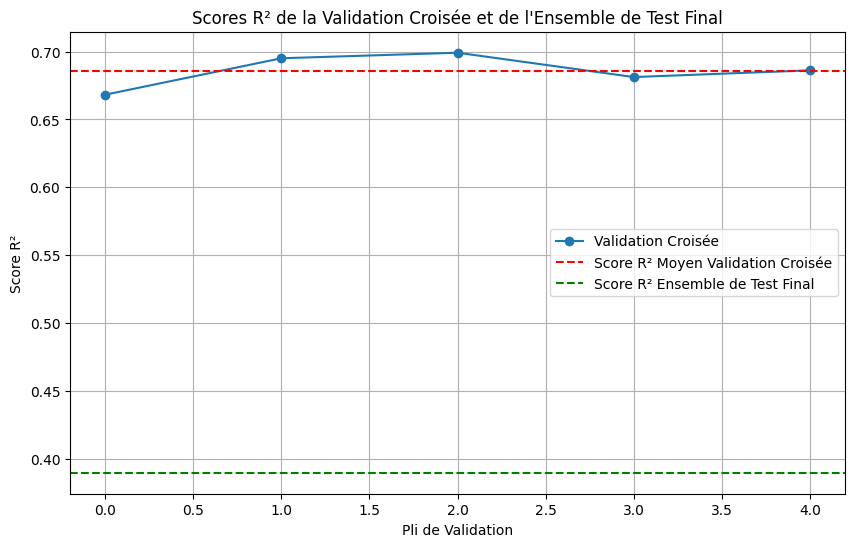

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Scores R² de la validation croisée et score R² sur l'ensemble de test final
cv_scores_r2 = [0.66822813, 0.69502999, 0.69911041, 0.6812015, 0.6861438]
cv_score_r2_mean = np.mean(cv_scores_r2)
test_score_r2 = 0.39

# Visualiser les scores R²
plt.figure(figsize=(10, 6))
plt.plot(cv_scores_r2, marker='o', linestyle='-', label='Validation Croisée')
plt.axhline(y=cv_score_r2_mean, color='r', linestyle='--', label='Score R² Moyen Validation Croisée')
plt.axhline(y=test_score_r2, color='g', linestyle='--', label='Score R² Ensemble de Test Final')
plt.xlabel('Pli de Validation')
plt.ylabel('Score R²')
plt.title('Scores R² de la Validation Croisée et de l\'Ensemble de Test Final')
plt.legend()
plt.grid(True)
plt.show()


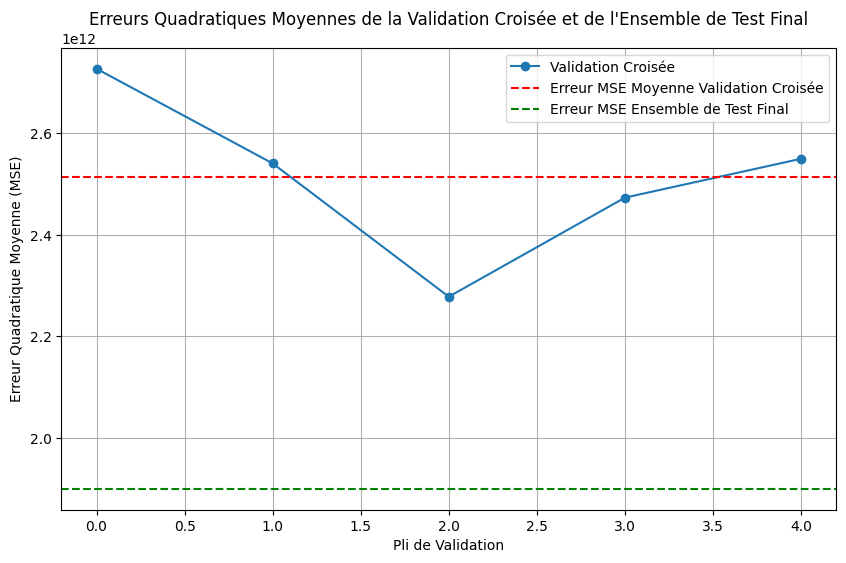

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Erreurs quadratiques moyennes (MSE) de la validation croisée et erreur MSE sur l'ensemble de test final
cv_mse = [2.72719438e+12, 2.54074454e+12, 2.27815812e+12, 2.47327286e+12, 2.54984895e+12]
cv_mse_mean = np.mean(cv_mse)
test_mse = 1900000000000

# Visualiser les erreurs quadratiques moyennes (MSE)
plt.figure(figsize=(10, 6))
plt.plot(cv_mse, marker='o', linestyle='-', label='Validation Croisée')
plt.axhline(y=cv_mse_mean, color='r', linestyle='--', label='Erreur MSE Moyenne Validation Croisée')
plt.axhline(y=test_mse, color='g', linestyle='--', label='Erreur MSE Ensemble de Test Final')
plt.xlabel('Pli de Validation')
plt.ylabel('Erreur Quadratique Moyenne (MSE)')
plt.title('Erreurs Quadratiques Moyennes de la Validation Croisée et de l\'Ensemble de Test Final')
plt.legend()
plt.grid(True)
plt.show()
